# Multi-Target Regression

In [44]:
import numpy as np
import sympy as sp
import pandas as pd
import math
import matplotlib.pyplot as plt

data=pd.read_csv('C:\\Users\\Utsav\\Desktop\\Projects\\Nuclear Property Prediction (EoS)\\case1.csv', sep=',',header=0)
data.head()

,e0,rho0,k0,q0,jo,l0,ksym0,nsmas,rmax,r14,lambda10,lambda14,lambda18,vs,qsym
0,-15.8689,0.1611,224.7651,238.4824,35.3659,50.6193,-110.1518,2.1004,10.2722,12.1612,2488.6715,333.8504,49.0337,0.9998,423.7202
1,-16.1900,0.1613,234.2391,114.2765,36.5871,52.8665,-76.1168,2.1769,10.6051,12.3266,2791.1309,395.8141,64.0643,0.9998,180.5748
2,-15.7564,0.1656,232.0309,190.5430,34.3259,44.7315,-67.6100,2.1513,10.4025,11.9278,2479.1626,351.7705,56.3647,0.9995,385.6867
3,-16.0897,0.1635,259.2558,172.7730,32.5705,57.5269,-84.8941,2.2118,10.8058,12.6223,3119.9209,441.2771,73.6572,0.9991,236.2859
4,-16.5004,0.1560,259.6723,253.9081,32.0063,48.0632,-90.6544,2.2528,10.9196,12.5597,3098.3256,467.4262,82.1830,0.9990,428.4234


In [45]:
X = data.iloc[:,0:7]
X.head()

,e0,rho0,k0,q0,jo,l0,ksym0
0,-15.8689,0.1611,224.7651,238.4824,35.3659,50.6193,-110.1518
1,-16.1900,0.1613,234.2391,114.2765,36.5871,52.8665,-76.1168
2,-15.7564,0.1656,232.0309,190.5430,34.3259,44.7315,-67.6100
3,-16.0897,0.1635,259.2558,172.7730,32.5705,57.5269,-84.8941
4,-16.5004,0.1560,259.6723,253.9081,32.0063,48.0632,-90.6544


In [46]:
y_nsmas = data.iloc[:, 7].values
y_rmax = data.iloc[:,8].values
y_r14 = data.iloc[:,9].values
y_lambda14 = data.iloc[:, 11].values
np.shape(X.values)

(1866, 7)

In [47]:
y_target = np.concatenate(([y_nsmas], [y_rmax], [y_r14], [y_lambda14]), axis=0).T
np.shape(y_target)

(1866, 4)

# Regression Chains

## Chain Order = nsmas --> rmax --> r14

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y_target, test_size=0.3, random_state=1)
from sklearn import multioutput
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
reg = multioutput.RegressorChain(RandomForestRegressor(), order=[0,1,2, 3])
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
np.shape(y_pred)

C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(560, 4)

RMSE: 0.046782915065208555


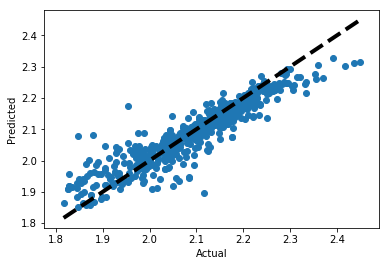

RMSE: 0.19806789836725575


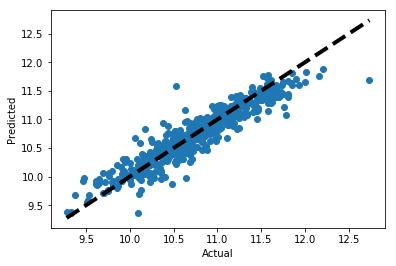

RMSE: 0.46680765594821433


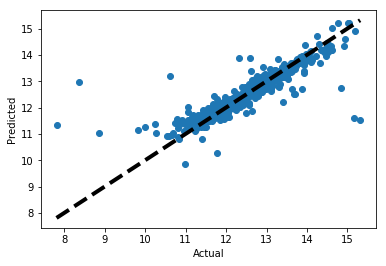

RMSE: 67.08645127081348


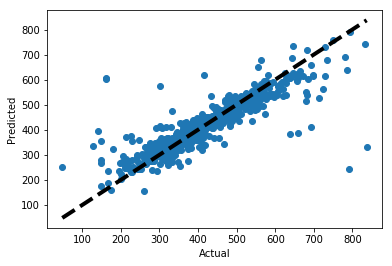

In [49]:
for i in range(4):
    print("RMSE: %s" % (np.sqrt(mean_squared_error(y_test[:,i], y_pred[:,i]))))
    fig, ax = plt.subplots()
    ax.scatter(y_test[:,i], y_pred[:,i])
    ax.plot([y_test[:,i].min(), y_test[:,i].max()], [y_test[:,i].min(), y_test[:,i].max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()

## Chain Order = nsmas --> r14 --> rmax

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y_target, test_size=0.3, random_state=1)
from sklearn import multioutput
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
reg = multioutput.RegressorChain(RandomForestRegressor(), order=[0,2,1])
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
np.shape(y_pred)

C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(560, 3)

RMSE: 0.04507473652569258


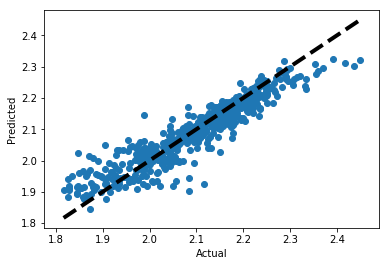

RMSE: 0.1811018084260771


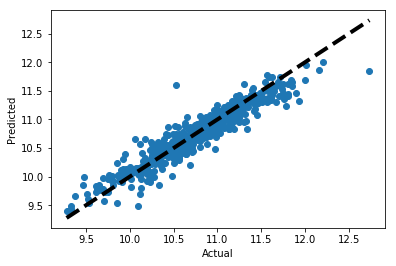

RMSE: 0.47467028867507133


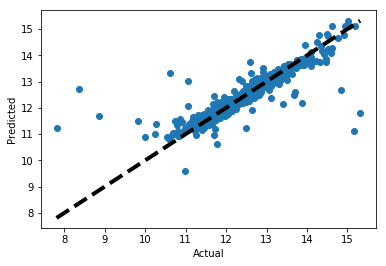

In [8]:
for i in range(3):
    print("RMSE: %s" % (np.sqrt(mean_squared_error(y_test[:,i], y_pred[:,i]))))
    fig, ax = plt.subplots()
    ax.scatter(y_test[:,i], y_pred[:,i])
    ax.plot([y_test[:,i].min(), y_test[:,i].max()], [y_test[:,i].min(), y_test[:,i].max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()

## Chain Order = r14 --> nsmas --> rmax

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y_target, test_size=0.3, random_state=1)
from sklearn import multioutput
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
reg = multioutput.RegressorChain(RandomForestRegressor(), order=[2,0,1])
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
np.shape(y_pred)

C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\Utsav\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


(560, 3)

RMSE: 0.047270990356252


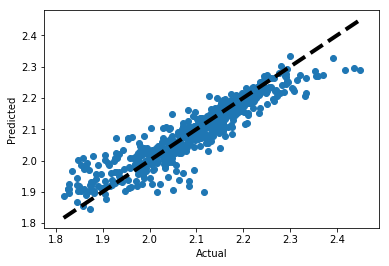

RMSE: 0.18310504712694584


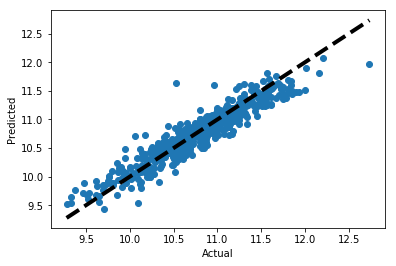

RMSE: 0.47703388081013737


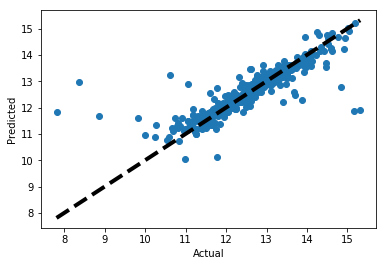

In [10]:
for i in range(3):
    print("RMSE: %s" % (np.sqrt(mean_squared_error(y_test[:,i], y_pred[:,i]))))
    fig, ax = plt.subplots()
    ax.scatter(y_test[:,i], y_pred[:,i])
    ax.plot([y_test[:,i].min(), y_test[:,i].max()], [y_test[:,i].min(), y_test[:,i].max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()

# SVM

In [15]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X.values, y_target, test_size=0.3, random_state=1)
from sklearn import multioutput
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor
reg = multioutput.RegressorChain(SVR(C=100000, gamma=1e-05, kernel='rbf'), order=[0,1,2])
reg.fit(X_train, y_train)
y_pred = reg.predict(X_test)
np.shape(y_pred)

(560, 3)

RMSE: 0.0472845062014497


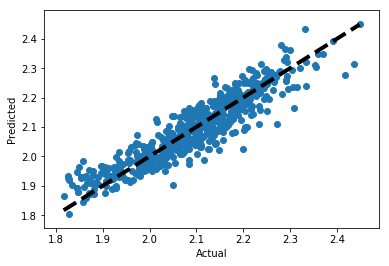

RMSE: 0.2579337630344806


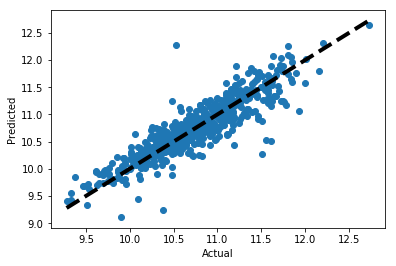

RMSE: 0.5024241568441041


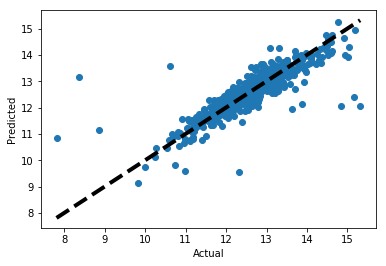

In [16]:
for i in range(3):
    print("RMSE: %s" % (np.sqrt(mean_squared_error(y_test[:,i], y_pred[:,i]))))
    fig, ax = plt.subplots()
    ax.scatter(y_test[:,i], y_pred[:,i])
    ax.plot([y_test[:,i].min(), y_test[:,i].max()], [y_test[:,i].min(), y_test[:,i].max()], 'k--', lw=4)
    ax.set_xlabel('Actual')
    ax.set_ylabel('Predicted')
    plt.show()

# Randomized Chains

In [41]:
from itertools import permutations 
perm = permutations([0, 1, 2]) 


In [40]:
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

scaler_output = StandardScaler()
scaler_output.fit_transform(y_train)

for i in list(perm): 
    print(i)
    reg = multioutput.RegressorChain(SVR(C=10000, gamma=1e-05, kernel='rbf'), order=np.array(i))
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    scaler_output.inverse_transform(y_pred)
    for j in range(3):
        print("RMSE (i,j): %s" % (np.sqrt(mean_squared_error(y_test[:,j], y_pred[:,j]))))

(0, 1, 2)
RMSE (i,j): 0.0472845062014497
RMSE (i,j): 0.22564027545816573
RMSE (i,j): 0.4739329815868947
(0, 2, 1)
RMSE (i,j): 0.0472845062014497
RMSE (i,j): 0.21983579459618466
RMSE (i,j): 0.46809163628309874
(1, 0, 2)
RMSE (i,j): 0.047715755502493185
RMSE (i,j): 0.21502702588469735
RMSE (i,j): 0.46796300443423383
(1, 2, 0)
RMSE (i,j): 0.047938318352112
RMSE (i,j): 0.21502702588469735
RMSE (i,j): 0.46963199163228003
(2, 0, 1)
RMSE (i,j): 0.04766035313058219
RMSE (i,j): 0.2127779043151105
RMSE (i,j): 0.46483046970331493
(2, 1, 0)
RMSE (i,j): 0.047920534855801264
RMSE (i,j): 0.21369430736022285
RMSE (i,j): 0.46483046970331493


In [43]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

scaler_output = MinMaxScaler()
scaler_output.fit_transform(y_train)

for i in list(perm): 
    print(i)
    reg = multioutput.RegressorChain(SVR(C=10000, gamma=1e-05, kernel='rbf'), order=np.array(i))
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    scaler_output.inverse_transform(y_pred)
    for j in range(3):
        print("RMSE (i,j): %s" % (np.sqrt(mean_squared_error(y_test[:,j], y_pred[:,j]))))

(0, 1, 2)
RMSE (i,j): 0.0472845062014497
RMSE (i,j): 0.22564027545816573
RMSE (i,j): 0.4739329815868947
(0, 2, 1)
RMSE (i,j): 0.0472845062014497
RMSE (i,j): 0.21983579459618466
RMSE (i,j): 0.46809163628309874
(1, 0, 2)
RMSE (i,j): 0.047715755502493185
RMSE (i,j): 0.21502702588469735
RMSE (i,j): 0.46796300443423383
(1, 2, 0)
RMSE (i,j): 0.047938318352112
RMSE (i,j): 0.21502702588469735
RMSE (i,j): 0.46963199163228003
(2, 0, 1)
RMSE (i,j): 0.04766035313058219
RMSE (i,j): 0.2127779043151105
RMSE (i,j): 0.46483046970331493
(2, 1, 0)
RMSE (i,j): 0.047920534855801264
RMSE (i,j): 0.21369430736022285
RMSE (i,j): 0.46483046970331493


- including Lambda14

In [50]:
from itertools import permutations 
perm = permutations([0, 1, 2, 3]) 

In [51]:
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

scaler_output = MinMaxScaler()
scaler_output.fit_transform(y_train)

for i in list(perm): 
    print(i)
    reg = multioutput.RegressorChain(SVR(C=10000, gamma=1e-05, kernel='rbf'), order=np.array(i))
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    scaler_output.inverse_transform(y_pred)
    for j in range(4):
        print("RMSE (i,j): %s" % (np.sqrt(mean_squared_error(y_test[:,j], y_pred[:,j]))))

(0, 1, 2, 3)
RMSE (i,j): 0.0472845062014497
RMSE (i,j): 0.22564027545816573
RMSE (i,j): 0.4739329815868947
RMSE (i,j): 75.28062363596241
(0, 1, 3, 2)
RMSE (i,j): 0.0472845062014497
RMSE (i,j): 0.22564027545816573
RMSE (i,j): 0.48576071205398286
RMSE (i,j): 75.90634714710923
(0, 2, 1, 3)
RMSE (i,j): 0.0472845062014497
RMSE (i,j): 0.21983579459618466
RMSE (i,j): 0.46809163628309874
RMSE (i,j): 75.1767387480613
(0, 2, 3, 1)
RMSE (i,j): 0.0472845062014497
RMSE (i,j): 0.2119079716758817
RMSE (i,j): 0.46809163628309874
RMSE (i,j): 75.20705259521246
(0, 3, 1, 2)
RMSE (i,j): 0.0472845062014497
RMSE (i,j): 0.2178191973369351
RMSE (i,j): 0.4853533357450814
RMSE (i,j): 76.23676362132353
(0, 3, 2, 1)
RMSE (i,j): 0.0472845062014497
RMSE (i,j): 0.21651910223755869
RMSE (i,j): 0.48747042800892415
RMSE (i,j): 76.23676362132353
(1, 0, 2, 3)
RMSE (i,j): 0.047715755502493185
RMSE (i,j): 0.21502702588469735
RMSE (i,j): 0.46796300443423383
RMSE (i,j): 75.3998154273801
(1, 0, 3, 2)
RMSE (i,j): 0.04771575550

In [55]:
from itertools import permutations 
perm = permutations([0, 1, 2, 3]) 

In [56]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

scaler_output = MinMaxScaler()
scaler_output.fit_transform(y_train)

for i in list(perm): 
    print(i)
    reg = multioutput.RegressorChain(RandomForestRegressor(), order=np.array(i))
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    scaler_output.inverse_transform(y_pred)
    for j in range(4):
        print("RMSE (i,j): %s" % (np.sqrt(mean_squared_error(y_test[:,j], y_pred[:,j]))))

(0, 1, 2, 3)
RMSE (i,j): 0.04688607814991409
RMSE (i,j): 0.1881507577601132
RMSE (i,j): 0.45984299770682907
RMSE (i,j): 67.48731899044571
(0, 1, 3, 2)
RMSE (i,j): 0.04637977351107736
RMSE (i,j): 0.19718015620129864
RMSE (i,j): 0.4662149799617756
RMSE (i,j): 70.82362454941918
(0, 2, 1, 3)
RMSE (i,j): 0.04636990967545662
RMSE (i,j): 0.18643311736103707
RMSE (i,j): 0.4665394975613436
RMSE (i,j): 66.91508535972002
(0, 2, 3, 1)
RMSE (i,j): 0.04568561952219229
RMSE (i,j): 0.2250628593343359
RMSE (i,j): 0.4765892015551384
RMSE (i,j): 66.82764313570625
(0, 3, 1, 2)
RMSE (i,j): 0.04563479329046661
RMSE (i,j): 0.2169951536589765
RMSE (i,j): 0.4729426561749729
RMSE (i,j): 70.7756550775692
(0, 3, 2, 1)
RMSE (i,j): 0.045911173066253086
RMSE (i,j): 0.21913057053003626
RMSE (i,j): 0.48660153792642974
RMSE (i,j): 70.4354665186032
(1, 0, 2, 3)
RMSE (i,j): 0.04809004784695167
RMSE (i,j): 0.19036136403662401
RMSE (i,j): 0.4736416245559603
RMSE (i,j): 69.26373653351558
(1, 0, 3, 2)
RMSE (i,j): 0.046816857

In [57]:
from itertools import permutations 
perm = permutations([0, 1, 2, 3]) 

In [58]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler.fit_transform(X_train)
scaler.transform(X_test)

scaler_output = MinMaxScaler()
scaler_output.fit_transform(y_train)

for i in list(perm): 
    print(i)
    reg = multioutput.RegressorChain(GradientBoostingRegressor(), order=np.array(i))
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    scaler_output.inverse_transform(y_pred)
    for j in range(4):
        print("RMSE (i,j): %s" % (np.sqrt(mean_squared_error(y_test[:,j], y_pred[:,j]))))

(0, 1, 2, 3)
RMSE (i,j): 0.038877376817337155
RMSE (i,j): 0.16121967354119157
RMSE (i,j): 0.44548157290410667
RMSE (i,j): 64.45029322359869
(0, 1, 3, 2)
RMSE (i,j): 0.03873417859278319
RMSE (i,j): 0.16087574770299023
RMSE (i,j): 0.44185639010000016
RMSE (i,j): 64.83550282776336
(0, 2, 1, 3)
RMSE (i,j): 0.038849242040714695
RMSE (i,j): 0.16309200193130582
RMSE (i,j): 0.453005930544175
RMSE (i,j): 64.19208903222531
(0, 2, 3, 1)
RMSE (i,j): 0.03877762094974929
RMSE (i,j): 0.17050941890923205
RMSE (i,j): 0.4530119486053619
RMSE (i,j): 62.52249054401348
(0, 3, 1, 2)
RMSE (i,j): 0.0389119101242707
RMSE (i,j): 0.17839768149880486
RMSE (i,j): 0.45249916758651937
RMSE (i,j): 66.56605176026106
(0, 3, 2, 1)
RMSE (i,j): 0.038922960548058015
RMSE (i,j): 0.17674070213883455
RMSE (i,j): 0.4512458590104603
RMSE (i,j): 66.61866600133797
(1, 0, 2, 3)
RMSE (i,j): 0.03949205645387137
RMSE (i,j): 0.1664015148671066
RMSE (i,j): 0.4523364648419213
RMSE (i,j): 65.66665607293355
(1, 0, 3, 2)
RMSE (i,j): 0.0396